In [1]:
#### this notebook requires installing the python package ggplot
#### on first use, need to repair two lines of code within the python ggplot package

import numpy as np
import pandas as pd
from ggplot import *

##### set simulation parameters 

np.random.seed(123)  # set the seed to ensure reproducibility
N = 1000             # set number of agents in economy
gamma = .5           # set Cobb-Douglas relative preference for consumption
tau = .2             # set tax rate

#### simulate income and wage data 
#### compute optimal consumption and leisure based ib Cobb-Douglas formalism

epsilon = np.random.normal(size=N)                              # draw unobserved non-labor income
wage = 10+np.random.normal(size=N)                              # draw observed wage

consump = gamma*(1-tau)*wage + gamma*epsilon                    # Cobb-Douglas demand for consumption
leisure = (1.0-gamma) + ((1.0-gamma)*epsilon)/((1.0-tau)*wage)  # Cobb-Douglas demand for leisure

##### create pandas dataframe, assign simulation results to variables in dataframe

df = pd.DataFrame()
df['consump'] = consump
df['leisure'] = leisure
df['wage'] = wage
df['epsilon'] = epsilon

In [2]:
#### verify simulation created 1000 data poinbts

df.index

RangeIndex(start=0, stop=1000, step=1)

In [3]:
##### write dataframe to file for later use, which involves testing the method of simulated moments

df.to_csv("consump_leisure.csv", index=False)

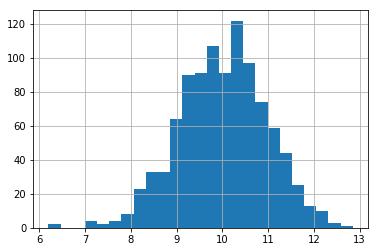

In [4]:
#### examine distribution of the simulated variables

df["wage"].hist(bins=25)

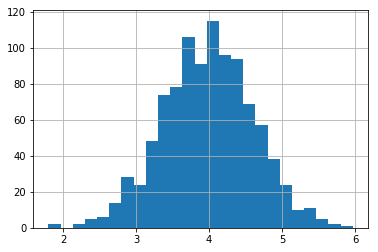

In [5]:
#### examine distribution of the simulated variables

df["consump"].hist(bins=25)

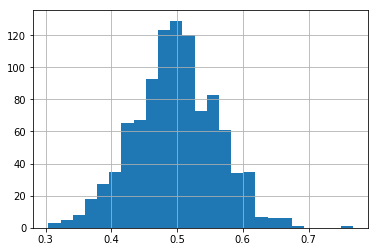

In [12]:
#### examine distribution of the simulated variables

df["leisure"].hist(bins=25)

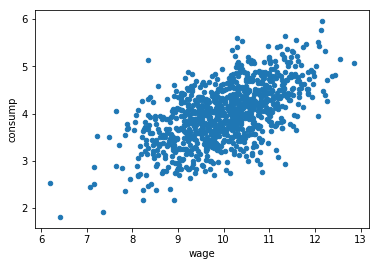

In [6]:
##### Examine the data that corresponds to the smoothed plot below

df.plot.scatter(x='wage', y='consump')

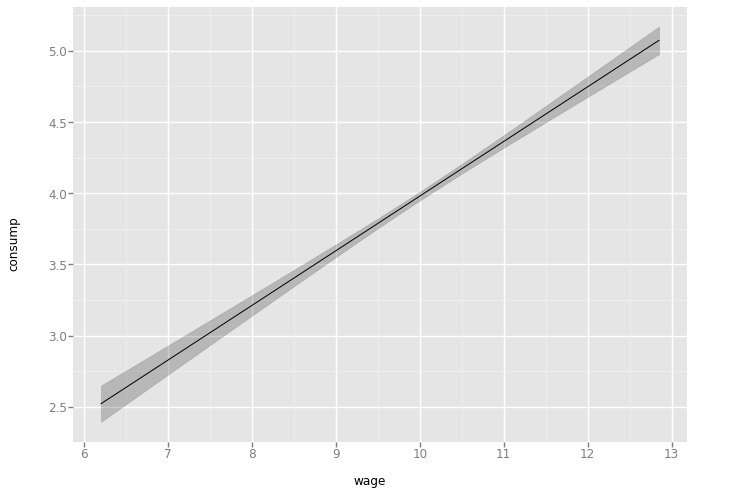

<ggplot: (-9223363291821204669)>

In [7]:
#### view plot of the linear fit plus uncertainty of the fitted line

ggplot(aes(x='wage',y='consump'),data=df) + stat_smooth()

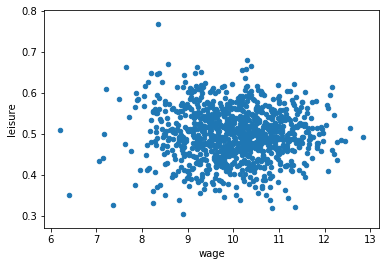

In [17]:
#### display simulation results for leisure vs. wage

df.plot.scatter(x='wage', y='leisure')

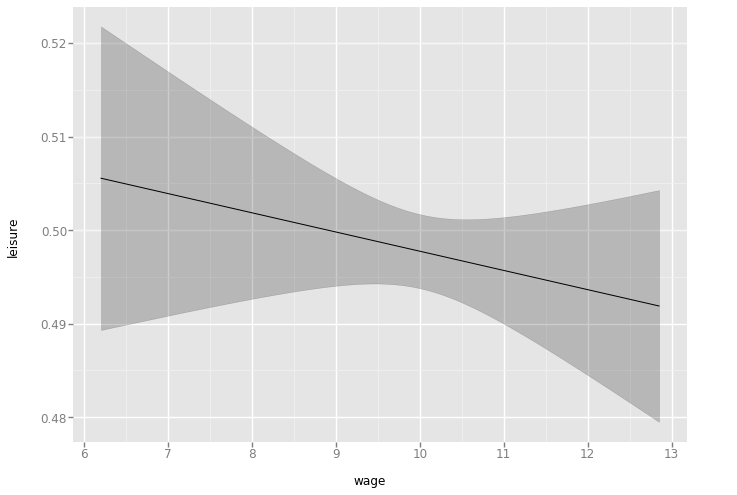

<ggplot: (-9223363291821248459)>

In [8]:
##### view smoothed plot fit representing trend plus uncertainty of the fitted trend line

ggplot(aes(x='wage',y='leisure'),data=df) + stat_smooth()